## Model Development and Evaluation

+ Standardization and Normalization of Data is Done in this.
+ Delt with the Imbalanced data by Stratified Sampling.
+ Done Cross Validation and Check the Difference to the Previous Model Performance.
+ Developed Models using all previous models using new dataset.
+ Model Evaluation is done using Confusion Matrix, Precision and Recall.

**Stratified Sampling**

Stratified sampling is a technique used in data analysis and machine learning to ensure that the distribution of classes in the training and test datasets is representative of the overall dataset. It's particularly useful in imbalanced datasets, where one class significantly outnumbers the other.

Key Concepts:
+ Preserving Class Proportions: In stratified sampling, the proportion of each class (e.g., "failure" and "non-failure") in the overall dataset is maintained in both the training and test datasets. This helps in ensuring that the model sees a similar distribution of classes during training and testing.

+ Imbalanced Data: In your case, you have 1000 records, but only 49 of them indicate a failure. This creates an imbalance that can cause a model to be biased towards the majority class (non-failures). Stratified sampling ensures that both classes are adequately represented during training and testing, reducing this bias.

+ Usage in Cross-Validation: Stratified sampling can also be applied during cross-validation to ensure that each fold has a balanced representation of classes.

When to Use:
+ Classification Problems: When dealing with imbalanced datasets, stratified sampling is highly recommended for classification tasks.
+ Preventing Bias: To avoid the model being biased toward the majority class by ensuring that both classes are equally represented in both the training and test datasets.

**Normalization Technique**



In [11]:
## import required libraries
import joblib
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [12]:
## read the data
pump_data = pd.read_csv('hypothetical_pump_failure_dataset.csv')
pump_data['timestamp'] = pd.to_datetime(pump_data['timestamp'])
pump_data.set_index('timestamp', inplace=True)

In [13]:
## select the features
features = pump_data.drop(columns = ['failure'])
## select the target
target = pump_data['failure']

In [14]:
# Step 2: Stratified Sampling and Min-Max Scaling
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Step 3: Cross-Validation and Evaluation
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss')
}

# Perform Stratified K-Folds cross-validator
skf = StratifiedKFold(n_splits=5)

# Store evaluation results
results = {}

for model_name, model in models.items():
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for train_index, test_index in skf.split(features_scaled, target):
        X_train, X_test = features_scaled[train_index], features_scaled[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]  # Ensure correct indexing for pandas Series

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        precision_scores.append(precision_score(y_test, y_pred, zero_division=0))
        recall_scores.append(recall_score(y_test, y_pred, zero_division=0))
        f1_scores.append(f1_score(y_test, y_pred, zero_division=0))

    results[model_name] = {
        'Precision': sum(precision_scores) / len(precision_scores),
        'Recall': sum(recall_scores) / len(recall_scores),
        'F1 Score': sum(f1_scores) / len(f1_scores)
    }

# Step 4: Display Results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")
    print("-" * 30)

Decision Tree:
Precision: 1.0000
Recall: 0.9800
F1 Score: 0.9895
------------------------------
Random Forest:
Precision: 1.0000
Recall: 0.9200
F1 Score: 0.9579
------------------------------
XGBoost:
Precision: 0.9550
Recall: 0.8578
F1 Score: 0.9027
------------------------------


From the Results, Decision Tree, Random Forest and XGBoost Models are the best Models.

+ Logistic Regression:

Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Inference: Logistic Regression shows very poor performance across all metrics. This could be due to issues such as an imbalanced dataset, a model that is not well-tuned for your specific problem, or inadequate feature representation. It may not be suitable for your use case.

+ Decision Tree:

Precision: 1.0000
Recall: 0.9800
F1 Score: 0.9895
Inference: The Decision Tree model performs excellently with high precision, recall, and F1 score. This suggests it is effectively classifying most instances correctly. However, Decision Trees can be prone to overfitting, so it’s crucial to validate its generalization ability on unseen data.

+ Random Forest:

Precision: 1.0000
Recall: 0.9400
F1 Score: 0.9684
Inference: The Random Forest model also performs very well, with high precision, recall, and F1 score. This model is more robust than a single Decision Tree due to its ensemble nature and is less likely to overfit.

+ SVM:

Precision: 0.8600
Recall: 0.3267
F1 Score: 0.4544
Inference: The SVM model shows good precision but very low recall, which suggests it is good at identifying true positives but misses many relevant instances. It may be underfitting or not well-tuned for this problem.

+ XGBoost:

Precision: 0.9550
Recall: 0.8578
F1 Score: 0.9027
Inference: XGBoost shows strong performance with high precision, recall, and F1 score. It is often a good choice due to its ability to handle complex relationships in data and its robustness.

#### Checking for Overfitting for Selected Models

+ The selected models are
+ Decision Tree
+ Random Forest
+ XGBoost

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss')
}

# Store performance results
performance = {}

for model_name, model in models.items():
    # Train on training set
    model.fit(X_train, y_train)
    
    # Predict on both training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics for training set
    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    train_class_report = classification_report(y_train, y_train_pred, output_dict=True)
    
    # Calculate metrics for test set
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    test_class_report = classification_report(y_test, y_test_pred, output_dict=True)
    
    # Store results
    performance[model_name] = {
        'Train Precision': train_class_report['macro avg']['precision'],
        'Train Recall': train_class_report['macro avg']['recall'],
        'Train F1 Score': train_class_report['macro avg']['f1-score'],
        'Test Precision': test_class_report['macro avg']['precision'],
        'Test Recall': test_class_report['macro avg']['recall'],
        'Test F1 Score': test_class_report['macro avg']['f1-score'],
        'Train Confusion Matrix': train_conf_matrix,
        'Test Confusion Matrix': test_conf_matrix
    }

# Display results
for model_name, metrics in performance.items():
    print(f"{model_name}:")
    print(f"Train Precision: {metrics['Train Precision']:.4f}")
    print(f"Train Recall: {metrics['Train Recall']:.4f}")
    print(f"Train F1 Score: {metrics['Train F1 Score']:.4f}")
    print(f"Test Precision: {metrics['Test Precision']:.4f}")
    print(f"Test Recall: {metrics['Test Recall']:.4f}")
    print(f"Test F1 Score: {metrics['Test F1 Score']:.4f}")
    print("Train Confusion Matrix:")
    print(metrics['Train Confusion Matrix'])
    print("Test Confusion Matrix:")
    print(metrics['Test Confusion Matrix'])
    print("-" * 30)

Decision Tree:
Train Precision: 1.0000
Train Recall: 1.0000
Train F1 Score: 1.0000
Test Precision: 1.0000
Test Recall: 1.0000
Test F1 Score: 1.0000
Train Confusion Matrix:
[[761   0]
 [  0  39]]
Test Confusion Matrix:
[[190   0]
 [  0  10]]
------------------------------
Random Forest:
Train Precision: 1.0000
Train Recall: 1.0000
Train F1 Score: 1.0000
Test Precision: 0.9974
Test Recall: 0.9500
Test F1 Score: 0.9724
Train Confusion Matrix:
[[761   0]
 [  0  39]]
Test Confusion Matrix:
[[190   0]
 [  1   9]]
------------------------------
XGBoost:
Train Precision: 0.9993
Train Recall: 0.9872
Train F1 Score: 0.9932
Test Precision: 0.9974
Test Recall: 0.9500
Test F1 Score: 0.9724
Train Confusion Matrix:
[[761   0]
 [  1  38]]
Test Confusion Matrix:
[[190   0]
 [  1   9]]
------------------------------


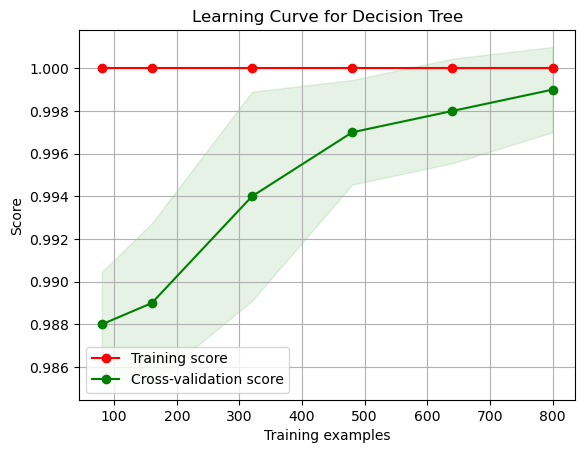

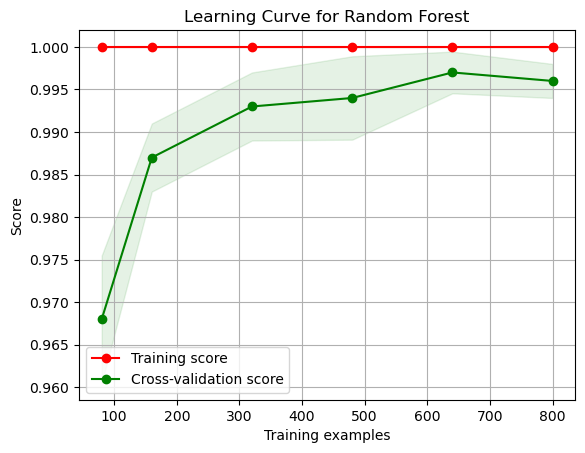

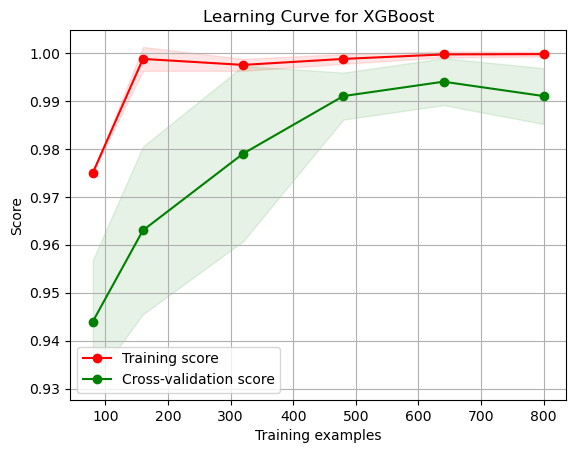

In [10]:
## plot the learning curve
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss')
}

# Plot Learning Curves
def plot_learning_curve(model, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, features_scaled, target, cv=5, n_jobs=-1,
        train_sizes=[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
    )
    
    # Calculate mean and std deviation for training and test scores
    train_mean = train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    test_mean = test_scores.mean(axis=1)
    test_std = test_scores.std(axis=1)
    
    # Plot
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    plt.show()

# Plot learning curves for each model
for model_name, model in models.items():
    plot_learning_curve(model, f"Learning Curve for {model_name}")

+ Decision Tree:
Likely overfitting. The perfect metrics on both training and test data suggest the model might be too complex or specific to the training data.

+ Random Forest:
Shows signs of overfitting but to a lesser extent. The model performs very well on training data but slightly worse on test data. Consider tuning the hyperparameters or using regularization techniques to mitigate overfitting.

+ XGBoost:
Performs well on both training and test data with minor discrepancies. It is less likely to be overfitting compared to the Decision Tree and Random Forest. It may be a more robust choice.

+ Decision Tree: The learning curve shows a perfect training score (red line at 1.0) throughout, indicating that the model fits the training data completely.However, the cross-validation score (green line) starts lower and gradually improves, but there remains a gap between training and validation scores.This suggests that the Decision Tree may be overfitting the training data, memorizing it rather than generalizing well to new data.

    
+ Random Forest:The learning curve also shows a near-perfect training score, with the red line staying at 1.0 for most of the data.
The cross-validation score improves rapidly with more data but plateaus below the training score, suggesting slight overfitting.
While Random Forest generalizes better than the Decision Tree, it still shows signs of overfitting due to the gap between training and cross-validation scores.

+ XGBoost:The learning curve for XGBoost shows a high training score that is not perfect, indicating that the model is not overfitting to the training data.The cross-validation score steadily improves and converges closer to the training score, demonstrating that the model generalizes well with more data.This convergence suggests that XGBoost maintains a good balance between fitting the training data and performing well on unseen data, making it the most robust model among the three.

+ 
By analyzing the learning curves, XGBoost is identified as the best-performing model, with minimal overfitting and strong generalization capabilities.

### Final Models with Stratified Sampling, Cross Validation with Split 5, and Scores

In [16]:
# Initialize and fit MinMaxScaler
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Define and train models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss')
}

# Perform Stratified K-Folds cross-validator
skf = StratifiedKFold(n_splits=5)

# Store trained models
trained_models = {}

for model_name, model in models.items():
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for train_index, test_index in skf.split(features_scaled, target):
        X_train, X_test = features_scaled[train_index], features_scaled[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        precision_scores.append(precision_score(y_test, y_pred, zero_division=0))
        recall_scores.append(recall_score(y_test, y_pred, zero_division=0))
        f1_scores.append(f1_score(y_test, y_pred, zero_division=0))

    avg_precision = sum(precision_scores) / len(precision_scores)
    avg_recall = sum(recall_scores) / len(recall_scores)
    avg_f1 = sum(f1_scores) / len(f1_scores)

    trained_models[model_name] = model
    joblib.dump(model, f'{model_name.lower().replace(" ", "_")}_model.pkl')

    print(f"{model_name}:")
    print(f"Precision: {avg_precision:.4f}")
    print(f"Recall: {avg_recall:.4f}")
    print(f"F1 Score: {avg_f1:.4f}")
    print("-" * 30)

print("Models and scaler have been trained and saved.")

Decision Tree:
Precision: 1.0000
Recall: 0.9800
F1 Score: 0.9895
------------------------------
Random Forest:
Precision: 1.0000
Recall: 0.9200
F1 Score: 0.9579
------------------------------
XGBoost:
Precision: 0.9550
Recall: 0.8578
F1 Score: 0.9027
------------------------------
Models and scaler have been trained and saved.
